In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 17s 64ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 2/5
235/235 [==============================] - 7s 29ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 3/5
235/235 [==============================] - 8s 33ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 4/5
235/235 [==============================] - 6s 25ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 5/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6938 - val_loss: 0.6937


Epoch 1/5
235/235 [==============================] - 9s 34ms/step - loss: 0.6936 - accuracy: 5.8333e-04 - val_loss: 0.6935 - val_accuracy: 4.0000e-04
Epoch 2/5
235/235 [==============================] - 8s 33ms/step - loss: 0.6935 - accuracy: 6.1667e-04 - val_loss: 0.6934 - val_accuracy: 7.0000e-04
Epoch 3/5
235/235 [==============================] - 7s 28ms/step - loss: 0.6934 - accuracy: 6.1667e-04 - val_loss: 0.6933 - val_accuracy: 7.0000e-04
Epoch 4/5
235/235 [==============================] - 8s 34ms/step - loss: 0.6933 - accuracy: 6.3333e-04 - val_loss: 0.6932 - val_accuracy: 7.0000e-04
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


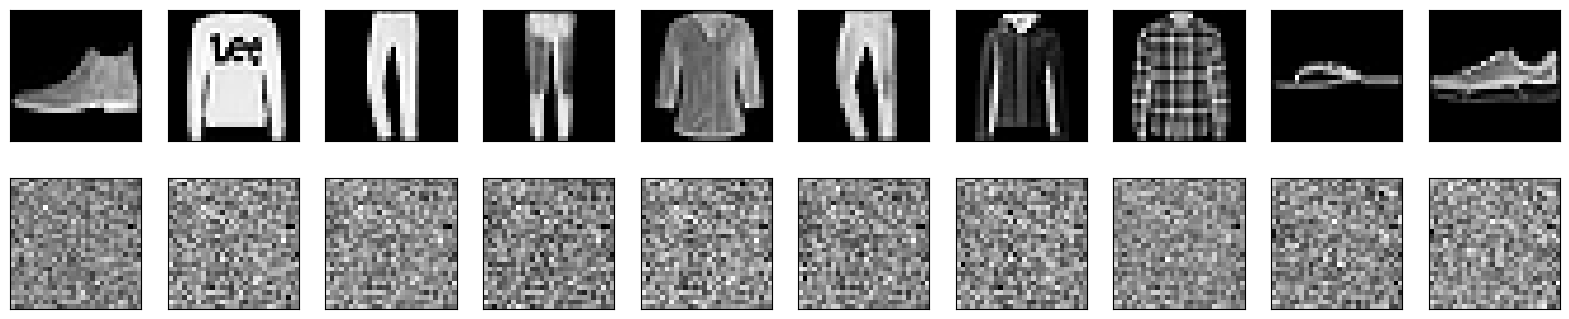

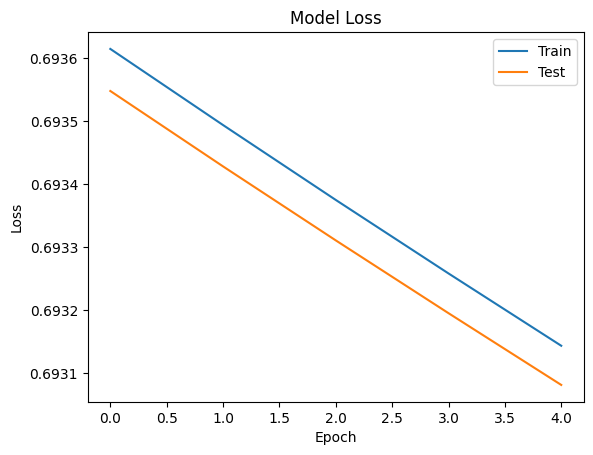

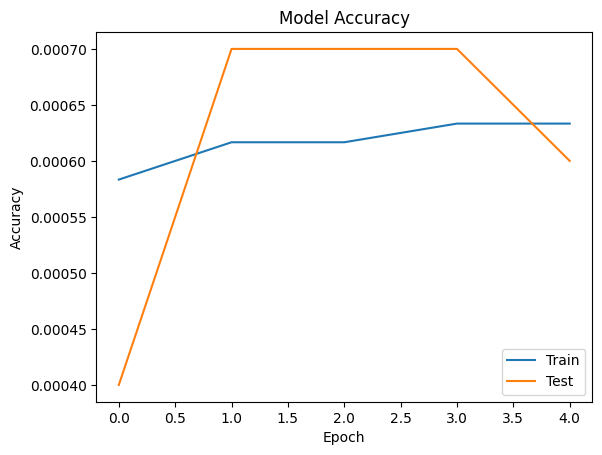

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the encoder dimension
encoding_dim = 32

# Define the input placeholder
input_img = Input(shape=(784,))

# Define the first hidden layer
hidden_1 = Dense(256, activation='relu')(input_img)

# Define the second hidden layer
encoded = Dense(encoding_dim, activation='relu')(hidden_1)

# Define the first hidden layer of the decoder
hidden_2 = Dense(256, activation='relu')(encoded)

# Define the output layer
decoded = Dense(784, activation='sigmoid')(hidden_2)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the data and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Make predictions on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize one of the reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original test image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed test image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot the loss and accuracy over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 0.6949 - val_loss: 0.6947
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6947 - val_loss: 0.6945
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6941 - val_loss: 0.6939
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6939 - val_loss: 0.6937
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6937 - val_loss: 0.6935
Epoch 8/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6935 - val_loss: 0.6933
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6931 - val_lo

Epoch 1/10
235/235 [==============================] - 4s 15ms/step - loss: 0.6975 - accuracy: 0.0011 - val_loss: 0.6973 - val_accuracy: 0.0014
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6972 - accuracy: 0.0012 - val_loss: 0.6970 - val_accuracy: 0.0015
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6969 - accuracy: 0.0012 - val_loss: 0.6967 - val_accuracy: 0.0015
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6966 - accuracy: 0.0012 - val_loss: 0.6964 - val_accuracy: 0.0015
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.6963 - accuracy: 0.0012 - val_loss: 0.6961 - val_accuracy: 0.0015
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6960 - accuracy: 0.0012 - val_loss: 0.6958 - val_accuracy: 0.0015
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6958 - accuracy: 0.0012 - val_loss: 0.6956 - val_accuracy: 0.0016

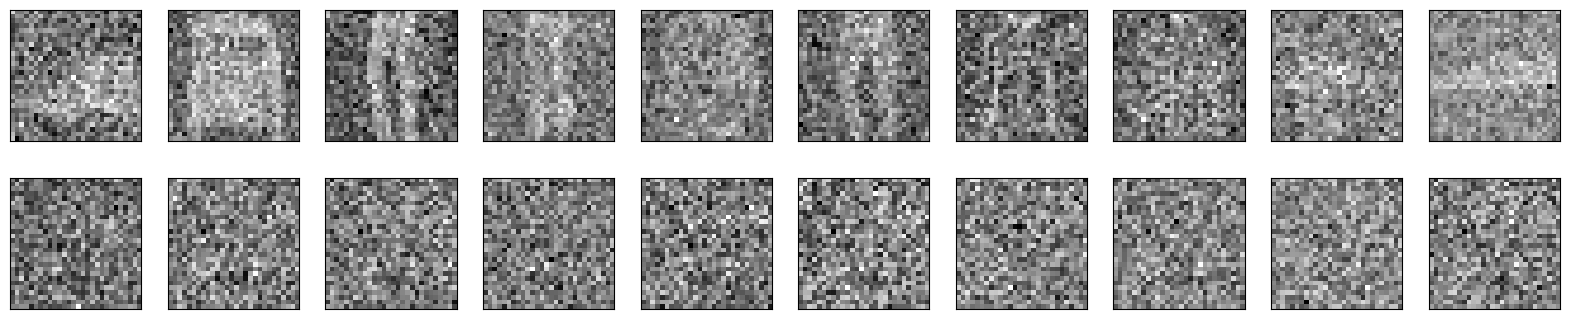

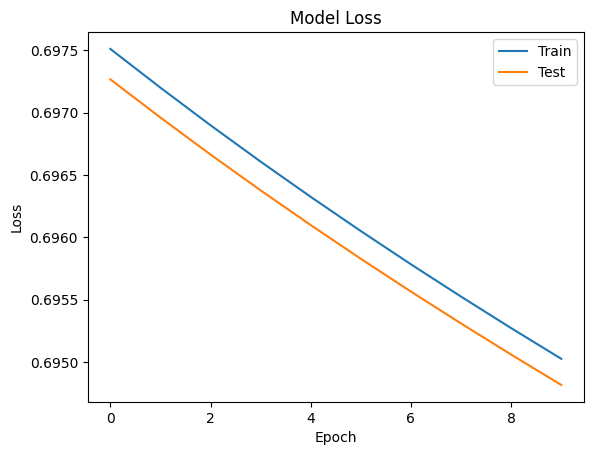

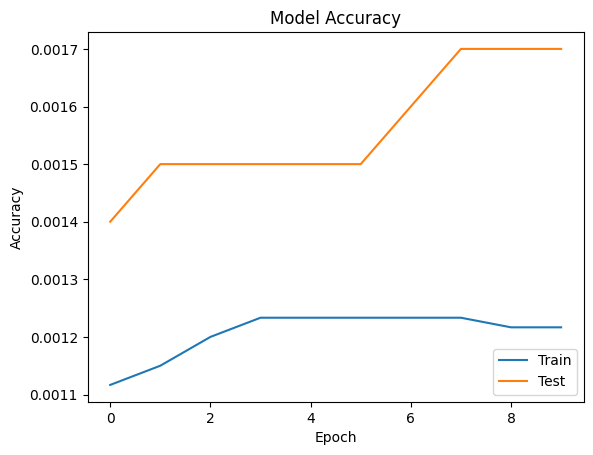

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the encoder dimension
encoding_dim = 32

# Define the input placeholder
input_img = Input(shape=(784,))

# Define the encoder layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoder layer
decoded = Dense(784, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the data and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add noise to the test data
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Generate reconstructed images from the noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize one of the noisy test images
plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Visualize one of the reconstructed test images
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot the loss and accuracy over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
